<a href="https://colab.research.google.com/github/zhubzy/SF-Incident-Prediction/blob/milestone-4/SF_Incident_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# San Francisco Incident Prediction

## Research Question / Topic:
 **How can we predict the nature of a crime incident (violent or non-violet) based on the time of day (morning, afternoon, evening, night) and specific location (latitude and longitude coordinates) in San Francisco?**

## Downloading the San Francisco Incident Report Dataset

In [36]:
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression


In [2]:
!wget -O Police_Department_Incident_Reports__2018_to_Present.csv 'https://drive.usercontent.google.com/download?id=1zeMUolmeJIKsL05RTSKOQ4QSS-lS0-WO&export=download&authuser=0&confirm=t&uuid=be261cfa-bbad-4ef4-ab27-19e263e41373&at=APZUnTVHDqDvxUJimYV3DAD_3UWF%3A1707720805000'

--2024-03-10 06:31:45--  https://drive.usercontent.google.com/download?id=1zeMUolmeJIKsL05RTSKOQ4QSS-lS0-WO&export=download&authuser=0&confirm=t&uuid=be261cfa-bbad-4ef4-ab27-19e263e41373&at=APZUnTVHDqDvxUJimYV3DAD_3UWF%3A1707720805000
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 172.253.115.132, 2607:f8b0:4004:c06::84
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|172.253.115.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 292150249 (279M) [application/octet-stream]
Saving to: ‘Police_Department_Incident_Reports__2018_to_Present.csv’

Police_Department_I 100%[===================>] 278.62M  76.5MB/s    in 3.6s    

2024-03-10 06:31:49 (76.5 MB/s) - ‘Police_Department_Incident_Reports__2018_to_Present.csv’ saved [292150249/292150249]



In [2]:
df = pd.read_csv('Police_Department_Incident_Reports__2018_to_Present.csv')

## Data Cleaning and Pre-Processing

In [3]:
df.columns

Index(['Incident Datetime', 'Incident Date', 'Incident Time', 'Incident Year',
       'Incident Day of Week', 'Report Datetime', 'Row ID', 'Incident ID',
       'Incident Number', 'CAD Number', 'Report Type Code',
       'Report Type Description', 'Filed Online', 'Incident Code',
       'Incident Category', 'Incident Subcategory', 'Incident Description',
       'Resolution', 'Intersection', 'CNN', 'Police District',
       'Analysis Neighborhood', 'Supervisor District',
       'Supervisor District 2012', 'Latitude', 'Longitude', 'Point',
       'Neighborhoods', 'ESNCAG - Boundary File',
       'Central Market/Tenderloin Boundary Polygon - Updated',
       'Civic Center Harm Reduction Project Boundary',
       'HSOC Zones as of 2018-06-05', 'Invest In Neighborhoods (IIN) Areas',
       'Current Supervisor Districts', 'Current Police Districts'],
      dtype='object')

In [4]:
df.size

27875960

First, we want to remove all rows where some data are missing for the columns we care about

In [5]:
columns_to_keep = ['Incident Datetime', 'Incident Time', 'Incident Year', 'Incident Day of Week', 'Intersection', 'Latitude', 'Longitude', 'Neighborhoods', 'Incident Category']

In [6]:
df = df.dropna(subset=columns_to_keep)

In [7]:
df_cleaned = df.drop(columns=[col for col in df.columns if col not in columns_to_keep]).dropna(subset=columns_to_keep)

In [8]:
df['Incident Category'].unique()

array(['Lost Property', 'Assault', 'Non-Criminal', 'Warrant',
       'Other Miscellaneous', 'Other', 'Suspicious Occ', 'Missing Person',
       'Disorderly Conduct', 'Rape', 'Larceny Theft', 'Fire Report',
       'Arson', 'Fraud', 'Robbery', 'Recovered Vehicle', 'Burglary',
       'Vandalism', 'Other Offenses', 'Suicide', 'Traffic Collision',
       'Motor Vehicle Theft', 'Courtesy Report', 'Drug Offense',
       'Malicious Mischief', 'Offences Against The Family And Children',
       'Sex Offense', 'Prostitution', 'Forgery And Counterfeiting',
       'Weapons Offense', 'Miscellaneous Investigation',
       'Stolen Property', 'Vehicle Misplaced', 'Traffic Violation Arrest',
       'Weapons Carrying Etc', 'Embezzlement', 'Suspicious',
       'Case Closure', 'Civil Sidewalks', 'Vehicle Impounded',
       'Drug Violation', 'Liquor Laws',
       'Human Trafficking, Commercial Sex Acts', 'Gambling', 'Homicide',
       'Motor Vehicle Theft?',
       'Human Trafficking (A), Commercial Sex Act

In [9]:
violent_category = [
    'Assault',
    'Rape',
    'Robbery',
    'Arson',
    'Vandalism',
    'Homicide',
    'Weapons Carrying Etc',
    'Weapons Offense',
    'Weapons Offence',
    'Human Trafficking, Commercial Sex Acts',
    'Human Trafficking (A), Commercial Sex Acts',
    'Human Trafficking (B), Involuntary Servitude'
]

We manually choose categories and put them as violent or non-violent

In [10]:
## TODO: Label the incident based on some other attributes
df_cleaned['violent'] = df['Incident Category'].apply(lambda x: x in violent_category)
df_cleaned.drop(columns=['Incident Category'])

,Incident Datetime,Incident Time,Incident Year,Incident Day of Week,Intersection,Latitude,Longitude,Neighborhoods,violent
11,2022/06/27 12:00:00 PM,12:00,2022,Monday,GEARY ST \ POWELL ST,37.787359,-122.408227,19.0,False
13,2023/03/16 05:30:00 PM,17:30,2023,Thursday,18TH ST \ DE HARO ST,37.762290,-122.401324,54.0,True
33,2023/03/21 03:50:00 PM,15:50,2023,Tuesday,POST ST \ LARKIN ST,37.787038,-122.418271,50.0,False
61,2021/08/22 09:40:00 AM,09:40,2021,Sunday,LAGUNA ST \ PACIFIC AVE,37.793977,-122.429804,102.0,False
87,2022/07/02 10:53:00 PM,22:53,2022,Saturday,GILMAN AVE \ HAWES ST,37.719298,-122.390020,88.0,True
...,...,...,...,...,...,...,...,...,...
796451,2023/03/22 01:30:00 PM,13:30,2023,Wednesday,24TH ST \ POTRERO AVE,37.753004,-122.406336,54.0,True
796452,2023/03/22 12:13:00 AM,00:13,2023,Wednesday,SACRAMENTO ST \ DIVISADERO ST,37.788995,-122.440624,102.0,False
796453,2023/03/21 09:19:00 PM,21:19,2023,Tuesday,MISSION ST \ ACTON ST \ SICKLES AVE,37.708806,-122.452665,66.0,False
796454,2023/03/22 03:28:00 PM,15:28,2023,Wednesday,BUSH ST \ GRANT AVE,37.790565,-122.405574,19.0,False


Standarization and normlization

In [11]:
df_cleaned

,Incident Datetime,Incident Time,Incident Year,Incident Day of Week,Incident Category,Intersection,Latitude,Longitude,Neighborhoods,violent
11,2022/06/27 12:00:00 PM,12:00,2022,Monday,Lost Property,GEARY ST \ POWELL ST,37.787359,-122.408227,19.0,False
13,2023/03/16 05:30:00 PM,17:30,2023,Thursday,Assault,18TH ST \ DE HARO ST,37.762290,-122.401324,54.0,True
33,2023/03/21 03:50:00 PM,15:50,2023,Tuesday,Non-Criminal,POST ST \ LARKIN ST,37.787038,-122.418271,50.0,False
61,2021/08/22 09:40:00 AM,09:40,2021,Sunday,Warrant,LAGUNA ST \ PACIFIC AVE,37.793977,-122.429804,102.0,False
87,2022/07/02 10:53:00 PM,22:53,2022,Saturday,Assault,GILMAN AVE \ HAWES ST,37.719298,-122.390020,88.0,True
...,...,...,...,...,...,...,...,...,...,...
796451,2023/03/22 01:30:00 PM,13:30,2023,Wednesday,Robbery,24TH ST \ POTRERO AVE,37.753004,-122.406336,54.0,True
796452,2023/03/22 12:13:00 AM,00:13,2023,Wednesday,Larceny Theft,SACRAMENTO ST \ DIVISADERO ST,37.788995,-122.440624,102.0,False
796453,2023/03/21 09:19:00 PM,21:19,2023,Tuesday,Non-Criminal,MISSION ST \ ACTON ST \ SICKLES AVE,37.708806,-122.452665,66.0,False
796454,2023/03/22 03:28:00 PM,15:28,2023,Wednesday,Larceny Theft,BUSH ST \ GRANT AVE,37.790565,-122.405574,19.0,False


In [12]:
# Encode Incident time into cos/sin encoding to preserve cyclinality
def transform_time(x):
    hour = (int)(x.split(":")[0])
    minute = (int)(x.split(":")[1])
    return hour + minute / 60

In [13]:
from sklearn.preprocessing import StandardScaler

def encoding_imporved(df_in):
    df_to_encode = df_in.copy()
    scaler = StandardScaler()
    df_to_encode['Incident Time'] = df_to_encode['Incident Time'].apply(transform_time)
    df_to_encode['hour_sin'] = np.sin(2 * np.pi * df_to_encode['Incident Time']/24.0)
    df_to_encode['hour_cos'] = np.cos(2 * np.pi * df_to_encode['Incident Time']/24.0)
    df_to_encode = pd.get_dummies(df_to_encode, columns=['Incident Year', 'Incident Day of Week', 'Neighborhoods'])
    df_to_encode['Latitude'] = scaler.fit_transform(df_to_encode['Latitude'].values.reshape(-1,1))
    df_to_encode['Longitude'] = scaler.fit_transform(df_to_encode['Longitude'].values.reshape(-1,1))
    boolean_columns = [col for col in df_to_encode.columns if df_to_encode[col].dtype == 'bool']
    df_to_encode[boolean_columns] = df_to_encode[boolean_columns].astype(float)
    columns_to_discard = ["Incident Time","Incident Category","Intersection",'Incident Datetime']
    
    return df_to_encode.drop(columns=columns_to_discard)

In [14]:
def encoding_standard(df_in):
    df_to_encode = df_in.copy()
    scaler = StandardScaler()
    df_to_encode['Latitude'] = scaler.fit_transform(df_to_encode['Latitude'].values.reshape(-1,1))
    df_to_encode['Longitude'] = scaler.fit_transform(df_to_encode['Longitude'].values.reshape(-1,1))
    df_to_encode['Incident Datetime'] = pd.to_datetime(df_to_encode['Incident Datetime'])
    df_to_encode['Hour'] = df_to_encode['Incident Datetime'].dt.hour
    df_to_encode['DayOfWeek'] = df_to_encode['Incident Day of Week']
    df_to_encode['Month'] = df_to_encode['Incident Datetime'].dt.month
    df_to_encode = pd.get_dummies(df_to_encode, columns=['Hour', 'DayOfWeek', 'Month'])
    return df_to_encode

In [15]:
standard_encoded_df = encoding_standard(df_cleaned)

In [16]:
improved_df = encoding_imporved(df_cleaned)

In [17]:
standard_encoded_df.columns

Index(['Incident Datetime', 'Incident Time', 'Incident Year',
       'Incident Day of Week', 'Incident Category', 'Intersection', 'Latitude',
       'Longitude', 'Neighborhoods', 'violent', 'Hour_0', 'Hour_1', 'Hour_2',
       'Hour_3', 'Hour_4', 'Hour_5', 'Hour_6', 'Hour_7', 'Hour_8', 'Hour_9',
       'Hour_10', 'Hour_11', 'Hour_12', 'Hour_13', 'Hour_14', 'Hour_15',
       'Hour_16', 'Hour_17', 'Hour_18', 'Hour_19', 'Hour_20', 'Hour_21',
       'Hour_22', 'Hour_23', 'DayOfWeek_Friday', 'DayOfWeek_Monday',
       'DayOfWeek_Saturday', 'DayOfWeek_Sunday', 'DayOfWeek_Thursday',
       'DayOfWeek_Tuesday', 'DayOfWeek_Wednesday', 'Month_1', 'Month_2',
       'Month_3', 'Month_4', 'Month_5', 'Month_6', 'Month_7', 'Month_8',
       'Month_9', 'Month_10', 'Month_11', 'Month_12'],
      dtype='object')

In [18]:
standard_encoded_df.head()

,Incident Datetime,Incident Time,Incident Year,Incident Day of Week,Incident Category,Intersection,Latitude,Longitude,Neighborhoods,violent,...,Month_3,Month_4,Month_5,Month_6,Month_7,Month_8,Month_9,Month_10,Month_11,Month_12
11,2022-06-27 12:00:00,12:00,2022,Monday,Lost Property,GEARY ST \ POWELL ST,0.745359,0.592648,19.0,False,...,0,0,0,1,0,0,0,0,0,0
13,2023-03-16 17:30:00,17:30,2023,Thursday,Assault,18TH ST \ DE HARO ST,-0.275915,0.853360,54.0,True,...,1,0,0,0,0,0,0,0,0,0
33,2023-03-21 15:50:00,15:50,2023,Tuesday,Non-Criminal,POST ST \ LARKIN ST,0.732270,0.213272,50.0,False,...,1,0,0,0,0,0,0,0,0,0
61,2021-08-22 09:40:00,09:40,2021,Sunday,Warrant,LAGUNA ST \ PACIFIC AVE,1.014963,-0.222335,102.0,False,...,0,0,0,0,0,1,0,0,0,0
87,2022-07-02 22:53:00,22:53,2022,Saturday,Assault,GILMAN AVE \ HAWES ST,-2.027304,1.280337,88.0,True,...,0,0,0,0,1,0,0,0,0,0


In [20]:
improved_df.head()

,Latitude,Longitude,violent,hour_sin,hour_cos,Incident Year_2018,Incident Year_2019,Incident Year_2020,Incident Year_2021,Incident Year_2022,...,Neighborhoods_108.0,Neighborhoods_109.0,Neighborhoods_110.0,Neighborhoods_111.0,Neighborhoods_112.0,Neighborhoods_113.0,Neighborhoods_114.0,Neighborhoods_115.0,Neighborhoods_116.0,Neighborhoods_117.0
11,0.745359,0.592648,0.0,1.224647e-16,-1.000000,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
13,-0.275915,0.853360,1.0,-9.914449e-01,-0.130526,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
33,0.732270,0.213272,0.0,-8.433914e-01,-0.537300,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
61,1.014963,-0.222335,0.0,5.735764e-01,-0.819152,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
87,-2.027304,1.280337,1.0,-2.881963e-01,0.957571,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [21]:
print(list(improved_df.columns))

['Latitude', 'Longitude', 'violent', 'hour_sin', 'hour_cos', 'Incident Year_2018', 'Incident Year_2019', 'Incident Year_2020', 'Incident Year_2021', 'Incident Year_2022', 'Incident Year_2023', 'Incident Day of Week_Friday', 'Incident Day of Week_Monday', 'Incident Day of Week_Saturday', 'Incident Day of Week_Sunday', 'Incident Day of Week_Thursday', 'Incident Day of Week_Tuesday', 'Incident Day of Week_Wednesday', 'Neighborhoods_1.0', 'Neighborhoods_2.0', 'Neighborhoods_3.0', 'Neighborhoods_4.0', 'Neighborhoods_5.0', 'Neighborhoods_6.0', 'Neighborhoods_7.0', 'Neighborhoods_8.0', 'Neighborhoods_9.0', 'Neighborhoods_10.0', 'Neighborhoods_11.0', 'Neighborhoods_12.0', 'Neighborhoods_13.0', 'Neighborhoods_14.0', 'Neighborhoods_15.0', 'Neighborhoods_16.0', 'Neighborhoods_17.0', 'Neighborhoods_18.0', 'Neighborhoods_19.0', 'Neighborhoods_20.0', 'Neighborhoods_21.0', 'Neighborhoods_22.0', 'Neighborhoods_23.0', 'Neighborhoods_24.0', 'Neighborhoods_25.0', 'Neighborhoods_26.0', 'Neighborhoods_27.0

In [22]:
def remap_street(value):
    return value.split("\\")[0]  # Use the first letter and make it uppercase
df_cleaned['Intersection'] = df_cleaned['Intersection'].apply(remap_street)

In [23]:
def balanceDf(df_to_balance):
    violent_df = df_to_balance[df_to_balance['violent'] == True]
    nonviolent_df = df_to_balance[df_to_balance['violent'] == False]
    min_size = min(len(violent_df), len(nonviolent_df))
    balanced_violent_df = violent_df.sample(n=min_size, random_state=1)
    balanced_nonviolent_df = nonviolent_df.sample(n=min_size, random_state=1)
    balanced_df = pd.concat([balanced_violent_df, balanced_nonviolent_df])
    return balanced_df.sample(frac=1)

In [71]:
def getTrainingData(df, balanced=True):
    if not balanced:
        return train_test_split(df.drop(columns=['violent']), df['violent'], test_size=0.2)
    else:
        # Resampled dataset with 50/50 splits between violent and non-violent crimes
        train_df_balanced = balanceDf(df) 
        return train_test_split(train_df_balanced.drop(columns=['violent']), train_df_balanced['violent'], test_size=0.2)

## Incident Datetime Data Exploration

In [16]:
df['Incident Datetime'].values

array(['2023/03/13 11:41:00 PM', '2023/03/01 05:02:00 AM',
       '2023/03/13 01:16:00 PM', ..., '2023/03/21 09:19:00 PM',
       '2023/03/22 03:28:00 PM', '2023/03/21 05:42:00 PM'], dtype=object)

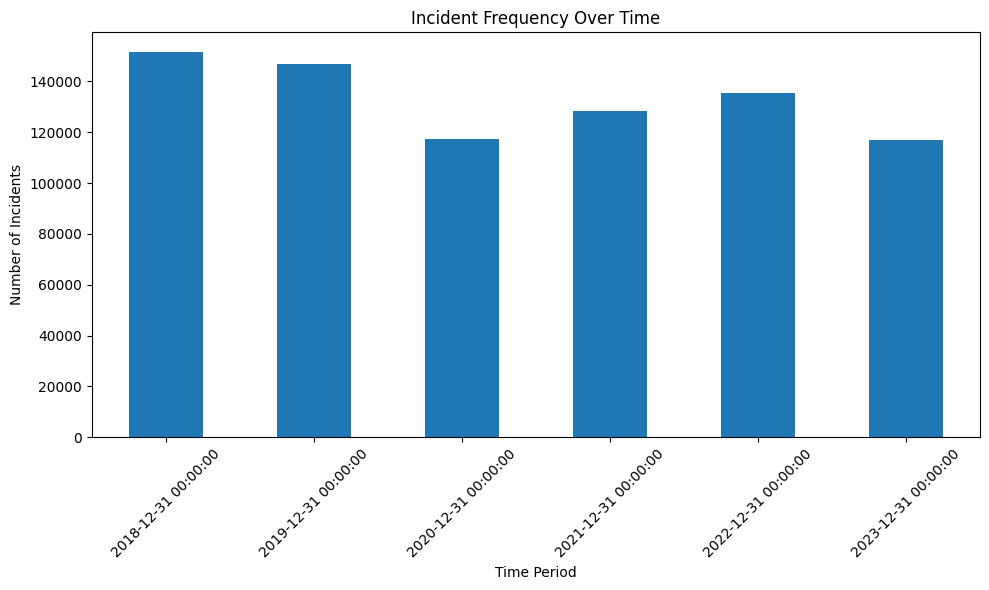

In [ ]:
df['Incident Datetime'] = pd.to_datetime(df['Incident Datetime'])

df.set_index('Incident Datetime', inplace=True)


incident_frequency = df.resample('Y').size()

plt.figure(figsize=(10, 6))
incident_frequency.plot(kind='bar')
plt.title('Incident Frequency Over Time')
plt.xlabel('Time Period')
plt.ylabel('Number of Incidents')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

From this graph, we can tell that the number of incidents of recent years has seen a significant decrease. Even though the decrease in 2020 can be explained with covid, the low number of incidents in 2023 is still a positive sign.

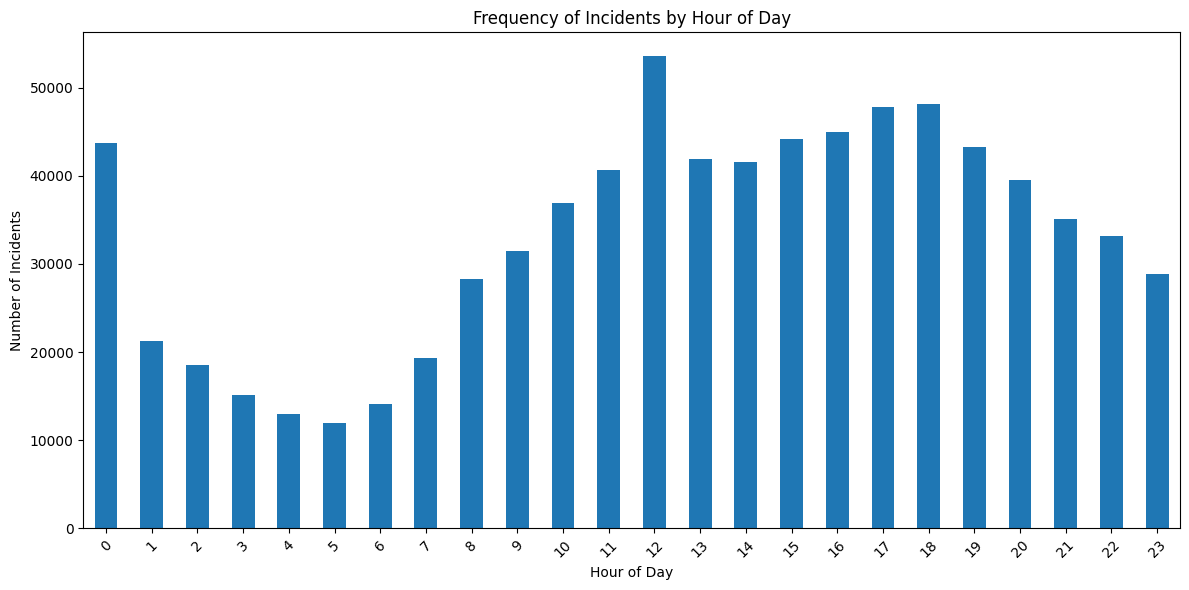

In [ ]:
df['Hour of the day'] = df.index.hour
hourly_frequency = df.groupby('Hour of the day').size()

plt.figure(figsize=(12, 6))
hourly_frequency.plot(kind='bar')
plt.title('Frequency of Incidents by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Incidents')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

From this graph, we see that the incident rate sees its peak at noon and afternoon. Besides, 1am to 7 pm are generally the safest hours.

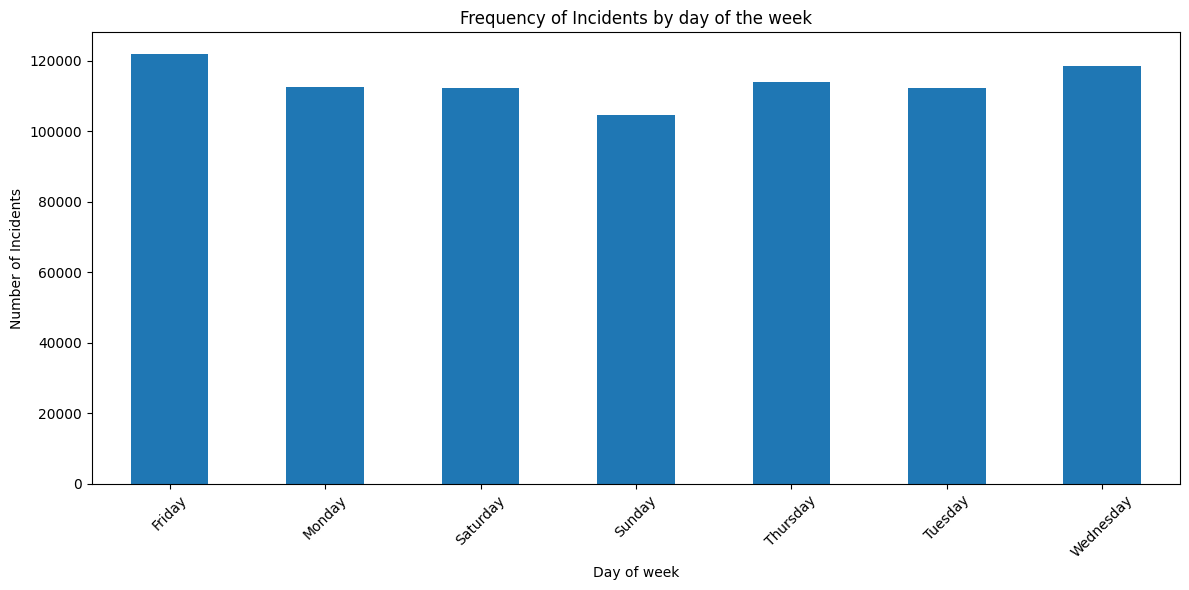

In [ ]:
day_of_week_counts = df['Incident Day of Week'].value_counts().sort_index()
day_of_week_counts

plt.figure(figsize=(12, 6))
day_of_week_counts.plot(kind='bar')
plt.title('Frequency of Incidents by day of the week')
plt.xlabel('Day of week')
plt.ylabel('Number of Incidents')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Here, we see the friday has the most incidents and sunday has the least. However, all days are more or less close to each other.

## Incident Location Data Exploration

In this code section below, we generated two types of data visualizations for exploring incident location data from San Francisco police reports, utilizing Plotly Express for interactive and detailed insights. With the use of Scatter Geo Plot, this map visualization focuses on the first 10,000 cleaned incidents, displaying them by latitude and longitude with different colors representing various incident categories. The map is centered on San Francisco, with specific geographic adjustments for a clear visualization of the area.

In [ ]:
fig = px.scatter_geo(df_cleaned[:10000],
                     lat='Latitude',
                     lon='Longitude',
                     color='Incident Category', # Differentiate points by Incident Category
                     hover_name='Incident Description', # Display Incident Description on hover
                     hover_data=['Resolution', 'Police District', 'Analysis Neighborhood'], # Additional data to show on hover
                     title='Incidents by Category and Location',
                     projection='natural earth') # Use a natural earth projection for the globe

fig.update_geos(
    visible=False, # Hide the default basemap for a cleaner look
    showcountries=True, countrycolor="RebeccaPurple",
    showsubunits=True, subunitcolor="Blue",
    center={"lat": 37.7749, "lon": -122.4194}, # Center the map on San Francisco
    lataxis_range=[37.70, 37.82], # Latitude range for San Francisco
    lonaxis_range=[-122.53, -122.36] # Longitude range for San Francisco
)

fig.update_layout(geo=dict(bgcolor= 'rgba(0,0,0,0)'),
                  paper_bgcolor='rgba(0,0,0,0)',
                  geo_landcolor='lightgrey')

fig.show()

![Location chart1](https://github.com/zhubzy/SF-Incident-Prediction/blob/main/location1.png?raw=1)


The code section below explores and visualizes the incident location data using histogram. This chart displays the count of incident types across different analysis neighborhoods in San Francisco, grouped by incident category. It is designed to offer a comparative view of incident frequencies in neighborhoods, with the neighborhoods ordered by the total number of incidents descending. This visualization is useful for identifying areas with higher incident rates and the commonality of incident types in each neighborhood. Notably, the 'Financial District/South Beach' neighborhood stands out with the highest count of incidents, particularly for 'Larceny Theft', which appears to be the most common incident category across almost all neighborhoods.

In summary, these two kinds of visualizations provide a comprehensive tool for analyzing spatial and categorical patterns in incident police reports for San Francisco, which could better help us understand the crime dynamics and analysis of incident types within the area of San Francisco.

In [ ]:
fig = px.histogram(df, x='Analysis Neighborhood', color='Incident Category',
                   barmode='group',
                   height=600,
                   title='Count of Incident Types per Analysis Neighborhood')
fig.update_layout(xaxis={'categoryorder':'total descending'},
                  xaxis_title="Analysis Neighborhood",
                  yaxis_title="Count of Incidents",
                  legend_title="Incident Category",
                  autosize=True)
fig.update_xaxes(tickangle=-45)
fig.show()

![Location chart2](https://github.com/zhubzy/SF-Incident-Prediction/blob/main/location2.png?raw=1)

## Incident Category Data Exploration

In [ ]:
df['Incident Category'].describe()

count            795743
unique               49
top       Larceny Theft
freq             242034
Name: Incident Category, dtype: object

In [ ]:
category_counts = df_cleaned['Incident Category'].value_counts()
category_counts

Larceny Theft                                   219521
Other Miscellaneous                              54071
Malicious Mischief                               51577
Assault                                          48376
Non-Criminal                                     46198
Burglary                                         43945
Motor Vehicle Theft                              42030
Fraud                                            25376
Recovered Vehicle                                22913
Warrant                                          22311
Drug Offense                                     19382
Lost Property                                    18625
Robbery                                          17782
Missing Person                                   17149
Suspicious Occ                                   16303
Disorderly Conduct                               13292
Offences Against The Family And Children         10542
Miscellaneous Investigation                       8670
Traffic Vi

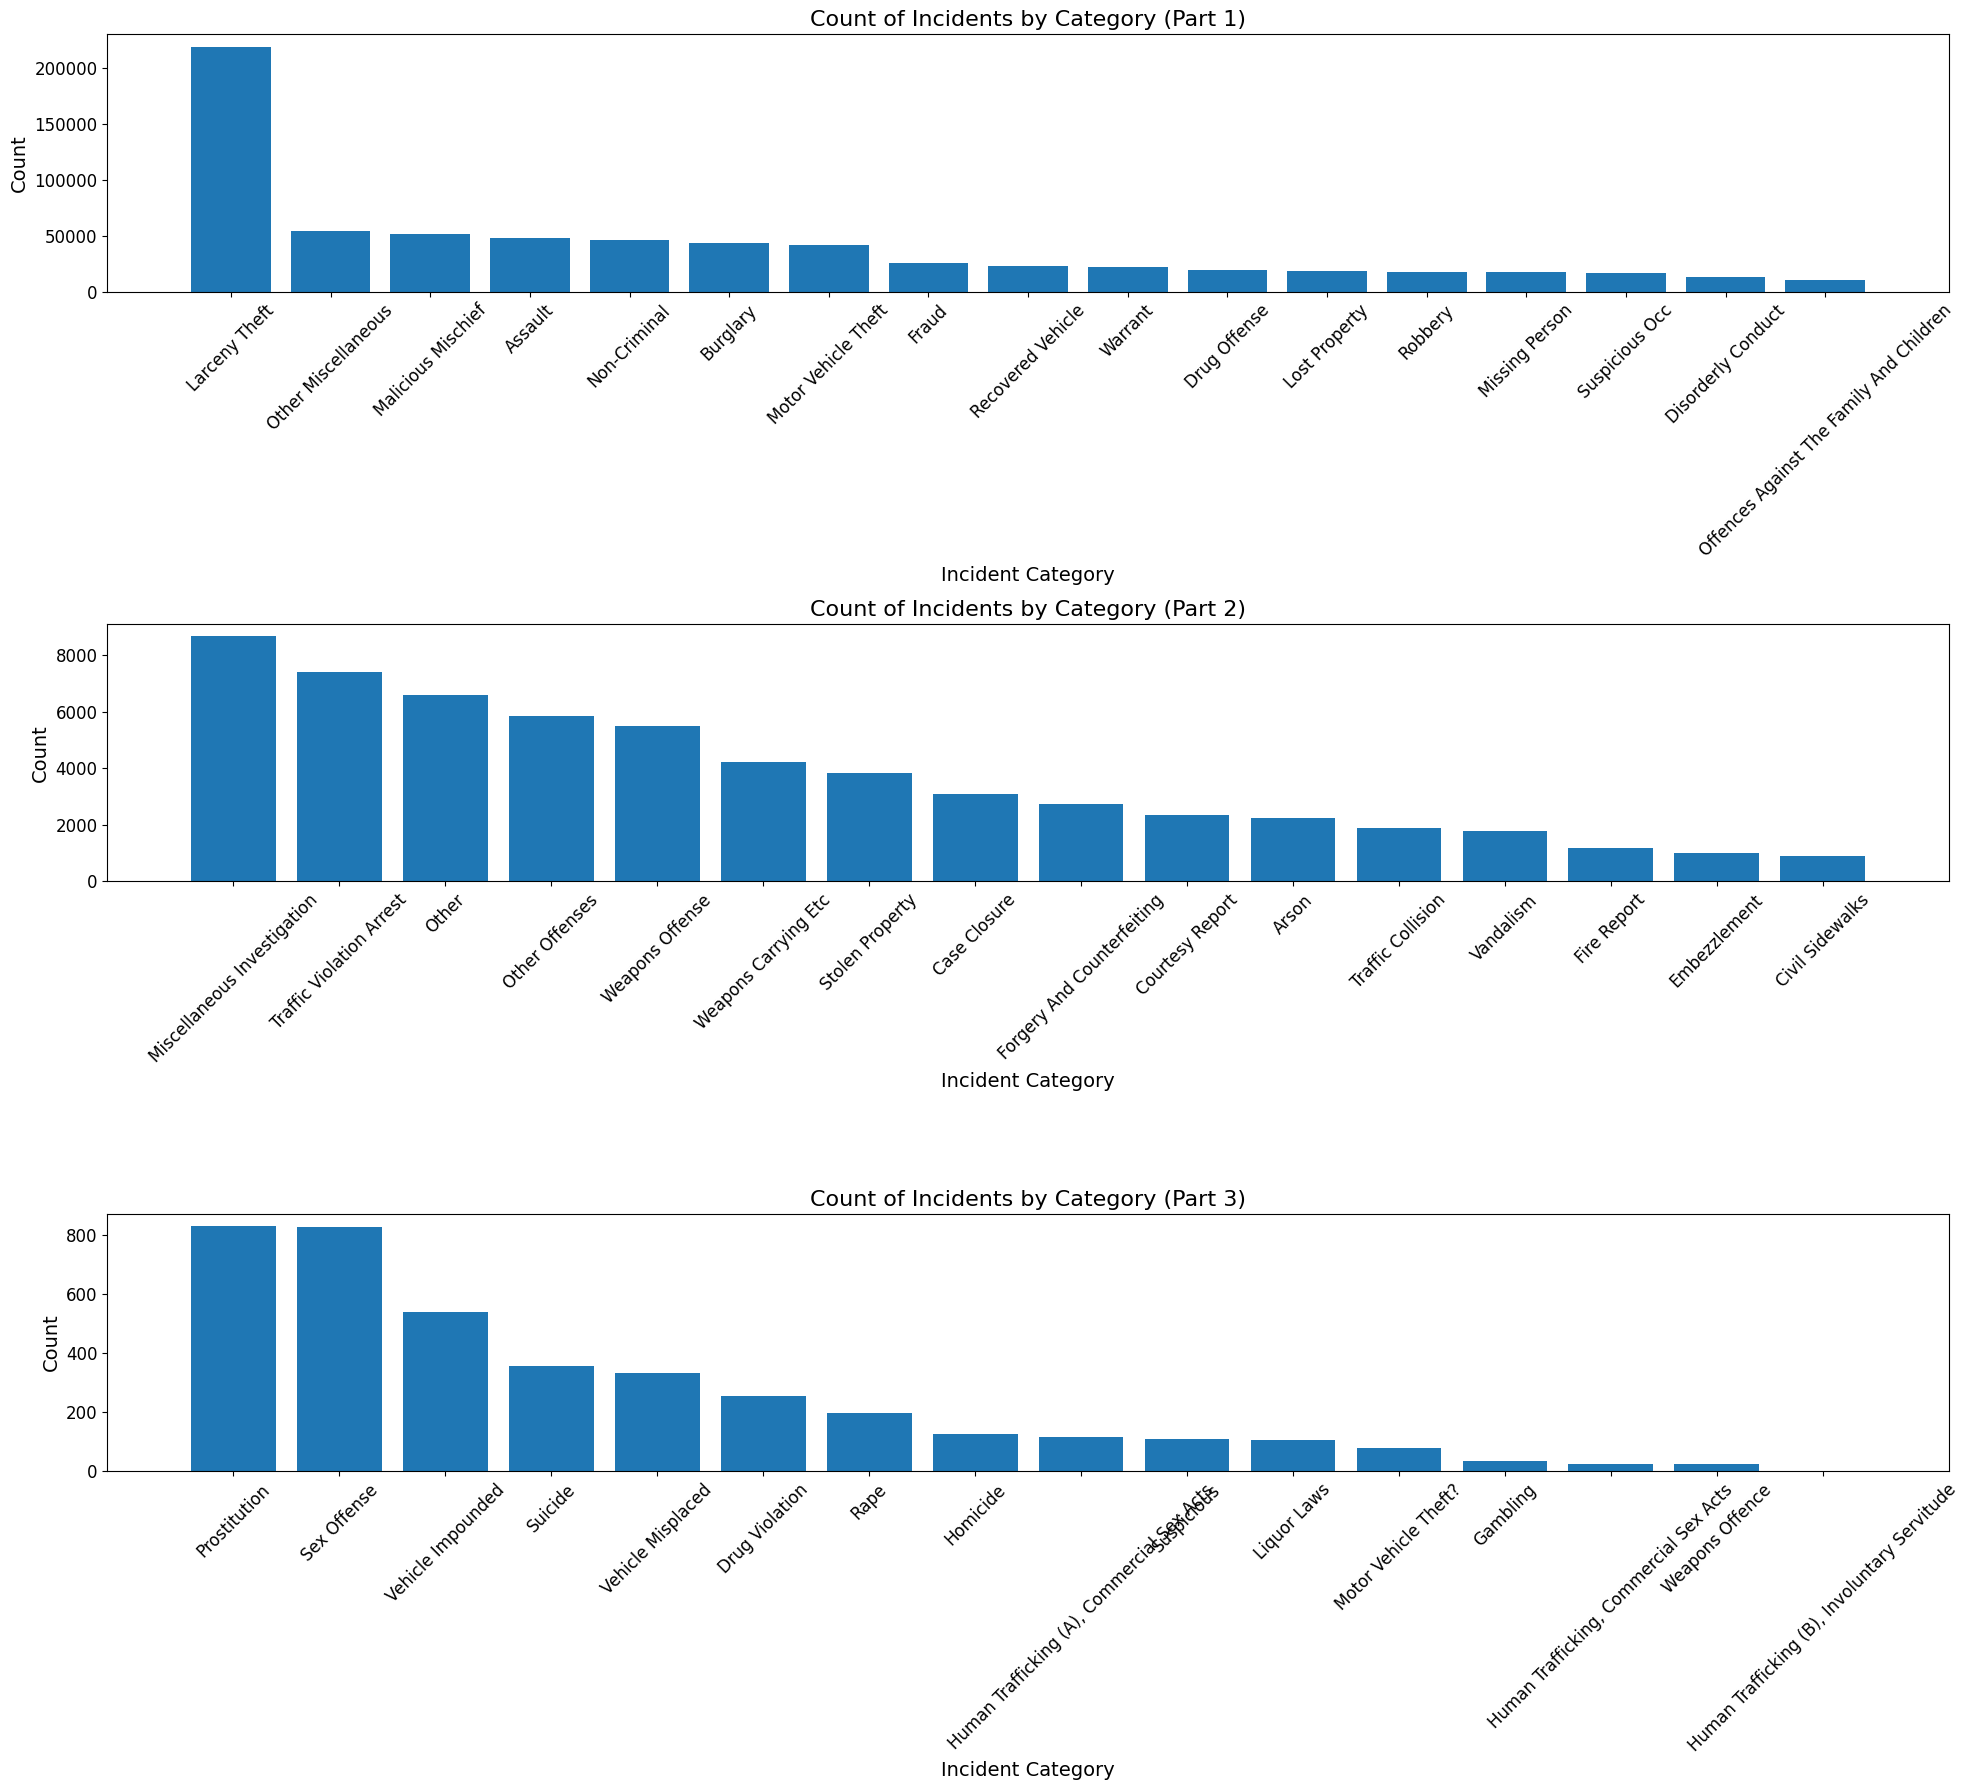

In [ ]:
thirds = np.array_split(category_counts, 3)

fig, axs = plt.subplots(3, 1, figsize=(20, 18))

for i, third in enumerate(thirds):
    axs[i].bar(third.index, third.values)
    axs[i].set_title('Count of Incidents by Category (Part {})'.format(i+1), fontsize=16)
    axs[i].set_xlabel('Incident Category', fontsize=14)
    axs[i].set_ylabel('Count', fontsize=14)
    axs[i].tick_params(axis='x', rotation=45, labelsize=12)
    axs[i].tick_params(axis='y', labelsize=12)

plt.tight_layout()
plt.show()

This is a histogram showing the counts of all the incident categories in the dataset. The number of categories is too large and the comparisons between some low-count incident categories are too trivial so that I split it into 3 parts, each containing 1/3 of all the categories of incidents.

As we can see in the histogram, latency theft is the most freqent kind of crime that happend in San Francisco, playing a dominant role in all categories of incidents.

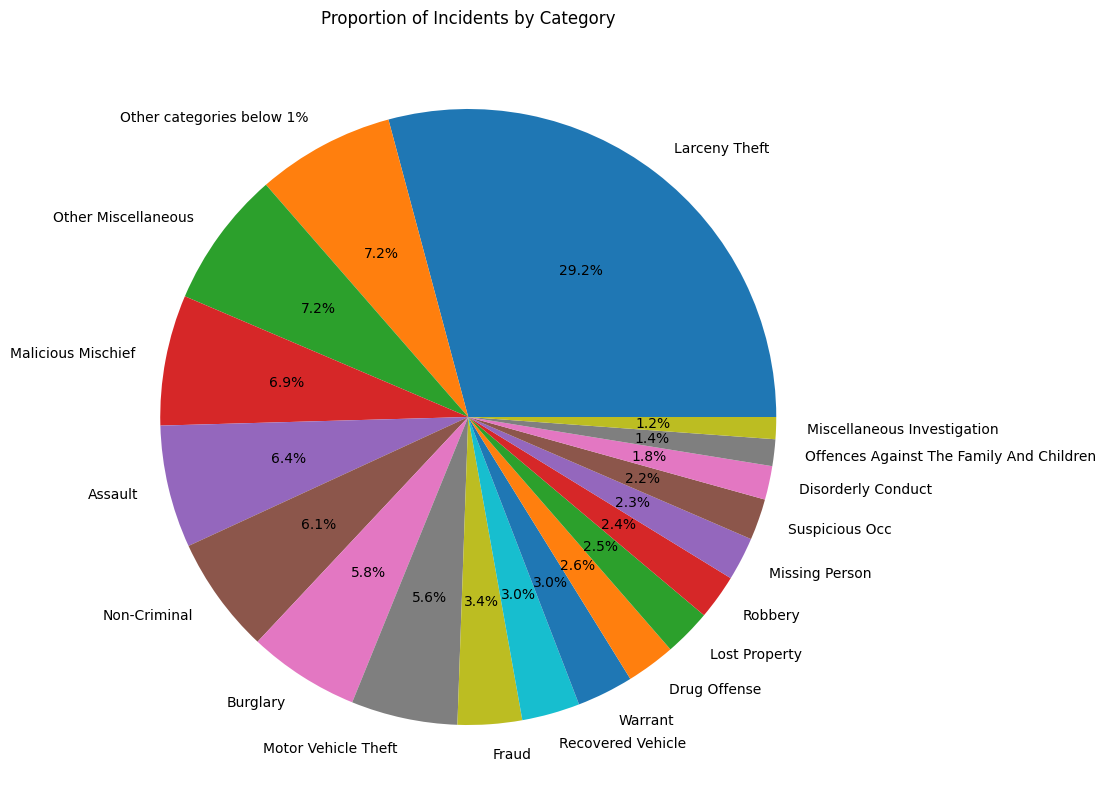

In [ ]:
category_percents = df_cleaned['Incident Category'].value_counts(normalize=True) * 100

category_counts_modified = df_cleaned['Incident Category'].apply(lambda x: 'Other categories below 1%' if category_percents[x] < 1 else x)

category_counts_modified = category_counts_modified.value_counts()

plt.figure(figsize=(10, 10), facecolor='white')
plt.pie(category_counts_modified, labels=category_counts_modified.index, autopct='%1.1f%%')
plt.title('Proportion of Incidents by Category')
plt.show()

This is a pie chart showing the proportions of all the incident categories. In order to make the graph look nicer, I combined all the categories with proportion below 1% together to be a new category called "Other categories below 1%".

As we can see from the pie chart, latency theft takes about 30% of all the incidents happened in San Francisco. We can also tell from the graphs that the categories are really diverse since the proportions of the categories except for latency theft are relatively close to each other and the combined proportion of all categories with their individual proportion less than 1% is 7.2%, which is the second largest proportion on the pie chart.

# EDA

## Milestone 3 - Logsitic Regression Model

In [ ]:


def LogisticRegressionTest(X_train, Y_train, X_test, Y_test, model_name):
    # Initialize the Logistic Regression model
    log_reg = LogisticRegression(max_iter=1000)  # Adjust max_iter if needed
    # Fit the model to the training data
    log_reg.fit(X_train, Y_train)

    # Predict on both the training and test data
    y_pred_train = log_reg.predict(X_train)
    y_pred_test = log_reg.predict(X_test)

    # Calculate metrics for both training and test sets
    accuracy_train = accuracy_score(Y_train, y_pred_train)
    precision_train = precision_score(Y_train, y_pred_train, average='binary')  # Adjust average as needed
    recall_train = recall_score(Y_train, y_pred_train, average='binary')  # Adjust average as needed
    f1_train = f1_score(Y_train, y_pred_train, average='binary')  # Adjust average as needed

    accuracy_test = accuracy_score(Y_test, y_pred_test)
    precision_test = precision_score(Y_test, y_pred_test, average='binary')  # Adjust average as needed
    recall_test = recall_score(Y_test, y_pred_test, average='binary')  # Adjust average as needed
    f1_test = f1_score(Y_test, y_pred_test, average='binary')  # Adjust average as needed

    # Print training metrics
    print(f'Training Metrics for {model_name}:')
    print(f'Accuracy: {accuracy_train:.2f}')
    print(f'Precision: {precision_train:.2f}')
    print(f'Recall: {recall_train:.2f}')
    print(f'F1 Score: {f1_train:.2f}\n')

    # Print test metrics
    print(f'Test Metrics for {model_name}:')
    print(f'Accuracy: {accuracy_test:.2f}')
    print(f'Precision: {precision_test:.2f}')
    print(f'Recall: {recall_test:.2f}')
    print(f'F1 Score: {f1_test:.2f}')

    # Generate and plot confusion matrix for test data
    cm = confusion_matrix(Y_test, y_pred_test)
    plt.figure(figsize=(10, 7))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.xlabel('Predicted')
    plt.ylabel('True')
    title = f'Confusion Matrix for {model_name}'
    plt.title(title)

    # Save the confusion matrix graph as PNG
    filename = f'{model_name}_confusion_matrix.png'
    plt.savefig(filename)
    plt.show()
    print(f'Confusion matrix graph saved as: {filename}')
    plt.close()  # Close the plot to avoid displaying it inline if not desired


c:\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Training Metrics for logistic_reg_model_unbalanced_train_set:
Accuracy: 0.89
Precision: 0.00
Recall: 0.00
F1 Score: 0.00

Test Metrics for logistic_reg_model_unbalanced_train_set:
Accuracy: 0.89
Precision: 0.00
Recall: 0.00
F1 Score: 0.00


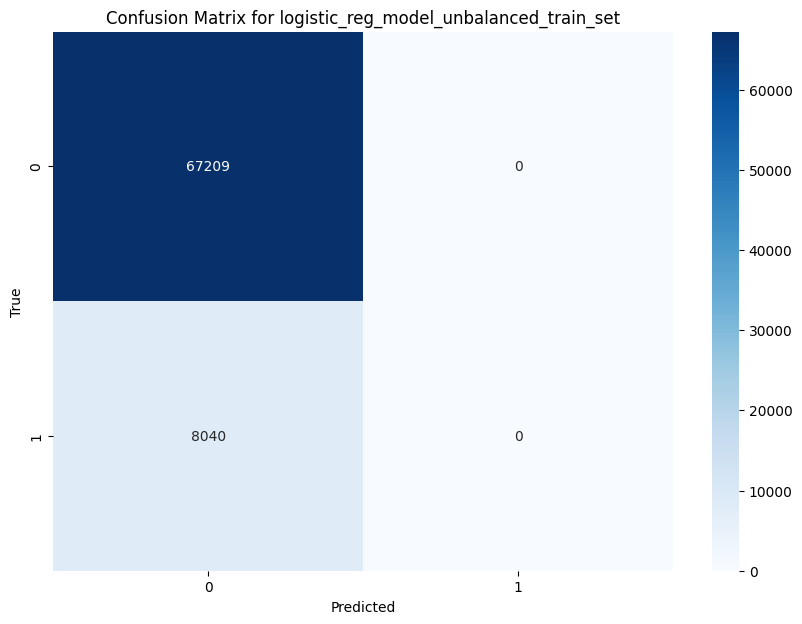

Confusion matrix graph saved as: logistic_reg_model_unbalanced_train_set_confusion_matrix.png


In [ ]:
y = df_cleaned['violent']
X_train, X_test, Y_train, Y_test = train_test_split(df_cleaned[['Latitude', 'Longitude', 'Hour', 'DayOfWeek', 'Month']], y, test_size=0.1, random_state=42, stratify=y)
LogisticRegressionTest(X_train, Y_train, X_test, Y_test, "logistic_reg_model_unbalanced_train_set")

We immediately get a very high accuracy in the model with class imbalance (since most crimes are not violent in nature, thus the modal will always predict 0 in all cases). To continue with the experiment, we try to create a balance dataset with equal distributions of crime data.

In [ ]:
violent_df = df_cleaned[df_cleaned['violent'] == True]
nonviolent_df = df_cleaned[df_cleaned['violent'] == False]
min_size = min(len(violent_df), len(nonviolent_df))
balanced_violent_df = violent_df.sample(n=min_size, random_state=1)
balanced_nonviolent_df = nonviolent_df.sample(n=min_size, random_state=1)
balanced_df = pd.concat([balanced_violent_df, balanced_nonviolent_df])

Training Metrics for logistic_reg_model_balanced_train_set:
Accuracy: 0.56
Precision: 0.55
Recall: 0.56
F1 Score: 0.56

Test Metrics for logistic_reg_model_balanced_train_set:
Accuracy: 0.56
Precision: 0.56
Recall: 0.57
F1 Score: 0.56


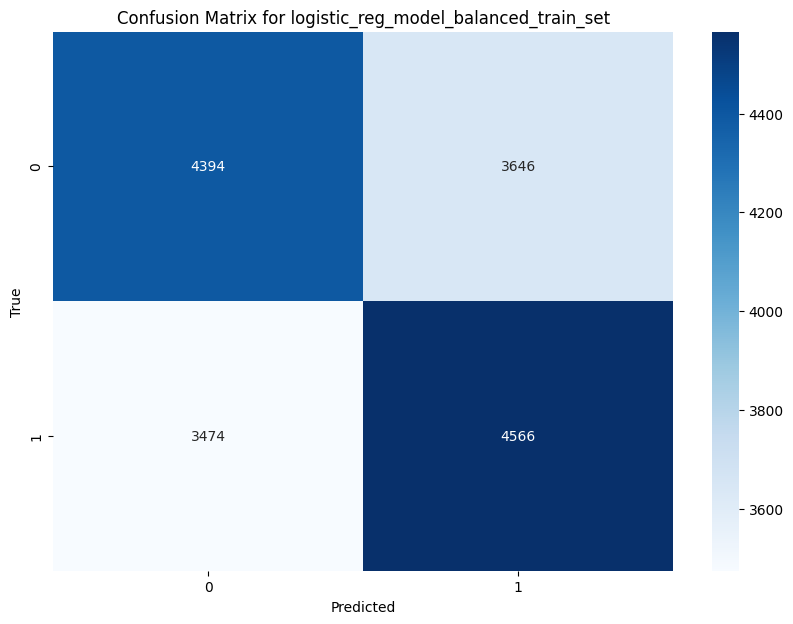

Confusion matrix graph saved as: logistic_reg_model_balanced_train_set_confusion_matrix.png


In [ ]:
from sklearn.model_selection import train_test_split
y = balanced_df['violent']
X_train, X_test, Y_train, Y_test = train_test_split(balanced_df[['Latitude', 'Longitude', 'Hour', 'DayOfWeek', 'Month']], y, test_size=0.1, random_state=42, stratify=y)
balanced_df['violent'] = balanced_df['violent'].astype(int)
LogisticRegressionTest(X_train, Y_train, X_test, Y_test,"logistic_reg_model_balanced_train_set")

The accuracy in this case is very low with the initial logistic regression modal, indicating that the data is hard to dataset is not linearly separable. Plotting the relationship between the normalized longitude latitude vs crime type confirms this, as there doesn't seem to a clear linear relationship with regards to location data. More feature enginerring is probably needed (such as one hot encoding the community instead).

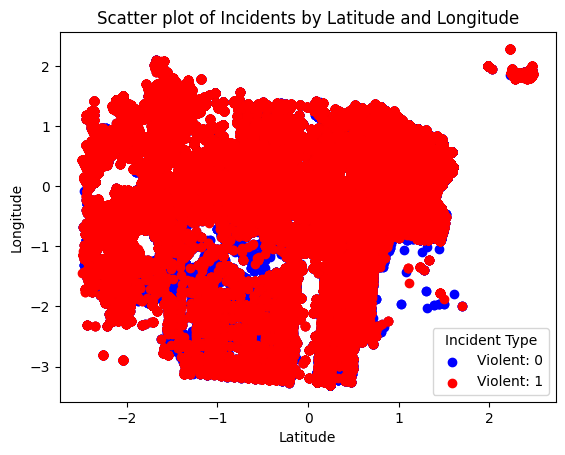

In [ ]:
# Plotting
fig, ax = plt.subplots()
# Plotting points with different colors for violent and non-violent incidents
for label, df in balanced_df.groupby('violent'):
    color = 'red' if label else 'blue'
    ax.scatter(df['Latitude'], df['Longitude'], c=color, label=f"Violent: {label}")

ax.set_xlabel('Latitude')
ax.set_ylabel('Longitude')
ax.legend(title='Incident Type')
ax.set_title('Scatter plot of Incidents by Latitude and Longitude')
plt.show()

In [ ]:
df_encoded = pd.get_dummies(balanced_df, columns=['Intersection'], prefix='Community')
df_encoded

,Incident Datetime,Incident Category,Latitude,Longitude,violent,Hour,DayOfWeek,Month,Community_01ST ST \ BUSH ST \ MARKET ST,Community_01ST ST \ CLEMENTINA ST,...,Community_YORK ST \ 22ND ST,Community_YORK ST \ HOLLADAY AVE,Community_YORK ST \ PERALTA AVE,Community_YOSEMITE AVE \ INGALLS ST,Community_YOSEMITE AVE \ LANE ST,Community_YUKON ST \ CASELLI AVE,Community_YUKON ST \ EAGLE ST,Community_YUKON ST \ SHORT ST,Community_ZIRCON PL \ 29TH ST,Community_ZOE ST \ BRYANT ST
306057,2022-12-24 09:36:00,Robbery,0.351861,0.288531,1,-0.613940,1.028259,1.628659,0,0,...,0,0,0,0,0,0,0,0,0,0
532910,2019-05-01 11:48:00,Robbery,0.544601,-0.578852,1,-0.304014,-0.493855,-0.429477,0,0,...,0,0,0,0,0,0,0,0,0,0
42205,2023-05-30 02:35:00,Assault,0.444939,0.457778,1,-1.698678,-1.001226,-0.429477,0,0,...,0,0,0,0,0,0,0,0,0,0
519316,2018-08-23 01:30:00,Robbery,0.636709,0.235315,1,-1.853641,0.013516,0.452581,0,0,...,0,0,0,0,0,0,0,0,0,0
217330,2022-11-13 21:30:00,Robbery,1.183351,0.732559,1,1.245612,1.535630,1.334640,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
462968,2018-09-10 20:14:00,Disorderly Conduct,0.412562,0.495541,0,1.090650,-1.508598,0.746601,0,0,...,0,0,0,0,0,0,0,0,0,0
721235,2020-10-29 09:55:00,Offences Against The Family And Children,1.287715,-0.206588,0,-0.613940,0.013516,1.040620,0,0,...,0,0,0,0,0,0,0,0,0,0
601622,2019-08-05 22:12:00,Burglary,0.404137,0.762737,0,1.400575,-1.508598,0.452581,0,0,...,0,0,0,0,0,0,0,0,0,0
775589,2021-05-19 14:50:00,Larceny Theft,0.535174,0.062431,0,0.160874,-0.493855,-0.429477,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
df_encoded = df_encoded.drop(['Incident Datetime', 'Incident Category'], axis=1)

y= df_encoded['violent']
X = df_encoded.drop('violent', axis=1)

X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.1, random_state=42, stratify=y)

Training Metrics for logistic_reg_model_balanced_with_intersection:
Accuracy: 0.65
Precision: 0.64
Recall: 0.68
F1 Score: 0.66

Test Metrics for logistic_reg_model_balanced_with_intersection:
Accuracy: 0.62
Precision: 0.61
Recall: 0.65
F1 Score: 0.63


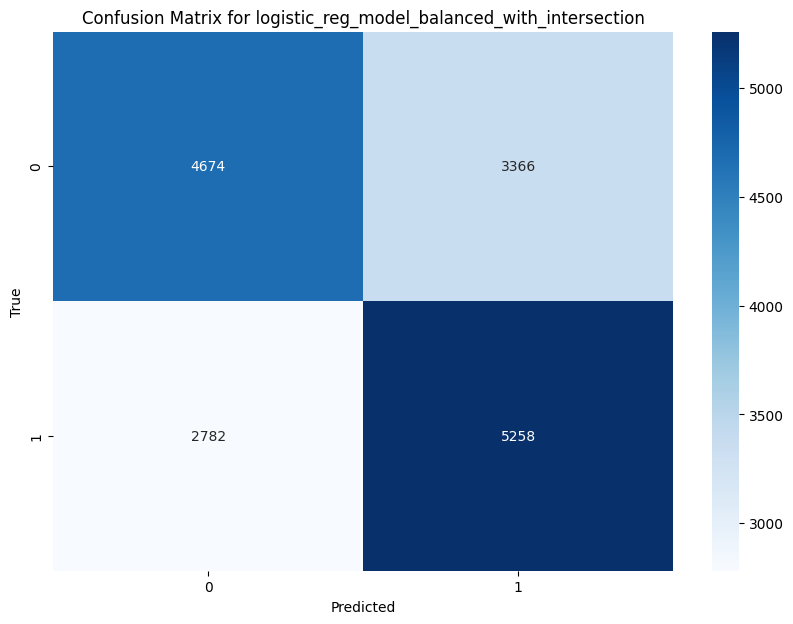

Confusion matrix graph saved as: logistic_reg_model_balanced_with_intersection_confusion_matrix.png


In [ ]:
LogisticRegressionTest(X_train, Y_train, X_test, Y_test, "logistic_reg_model_balanced_with_intersection")

As we can see, encoding the community (intersection) did improved the accuracy for a bit, as we increased the granularity of geographic information in the dataset. We transform categorical location data into a format that the model is able to use, which allow it to detect patterns or trends associated with specific intersections.

Now we can explore more on the temporal features. We can extract the Hour, DayOfWeek coloumns to make a binary feature that indicate whether the incident occured on a weekend or not. And we can have another feature named partOfDay to categorize the hour into different parts like Morning, Afternoon, and Evening.

In [ ]:
balanced_df['IsWeekend'] = balanced_df['Incident Datetime'].dt.dayofweek >= 5
balanced_df

,Incident Datetime,Incident Category,Intersection,Latitude,Longitude,violent,Hour,DayOfWeek,Month,IsWeekend
306057,2022-12-24 09:36:00,Robbery,LARKIN ST \ HAYES ST,0.351861,0.288531,1,-0.613940,1.028259,1.628659,True
532910,2019-05-01 11:48:00,Robbery,DIVISADERO ST \ OFARRELL ST,0.544601,-0.578852,1,-0.304014,-0.493855,-0.429477,False
42205,2023-05-30 02:35:00,Assault,STEVENSON ST \ 07TH ST \ ODD FELLOWS WAY,0.444939,0.457778,1,-1.698678,-1.001226,-0.429477,False
519316,2018-08-23 01:30:00,Robbery,OLIVE ST \ LARKIN ST,0.636709,0.235315,1,-1.853641,0.013516,0.452581,False
217330,2022-11-13 21:30:00,Robbery,BROADWAY \ DIRK DIRKSEN PL,1.183351,0.732559,1,1.245612,1.535630,1.334640,True
...,...,...,...,...,...,...,...,...,...,...
462968,2018-09-10 20:14:00,Disorderly Conduct,MISSION ST \ 07TH ST,0.412562,0.495541,0,1.090650,-1.508598,0.746601,False
721235,2020-10-29 09:55:00,Offences Against The Family And Children,OCTAVIA ST \ LOMBARD ST,1.287715,-0.206588,0,-0.613940,0.013516,1.040620,False
601622,2019-08-05 22:12:00,Burglary,FALMOUTH ST \ SHIPLEY ST,0.404137,0.762737,0,1.400575,-1.508598,0.452581,False
775589,2021-05-19 14:50:00,Larceny Theft,FRANKLIN ST \ LARCH ST,0.535174,0.062431,0,0.160874,-0.493855,-0.429477,False


In [ ]:
# 0 stands for Morning, 1 stands for Afternoon, 2 stands for Evening, and 4 stands for Night
def get_part_of_day(hour):
    if 5 <= hour < 12:
        return 0
    elif 12 <= hour < 17:
        return 1
    elif 17 <= hour < 21:
        return 2
    else:
        return 3

balanced_df['Hours'] = balanced_df['Incident Datetime'].dt.hour
balanced_df['Part of Day'] = balanced_df['Hours'].apply(get_part_of_day)
balanced_df

,Incident Datetime,Incident Category,Intersection,Latitude,Longitude,violent,Hour,DayOfWeek,Month,IsWeekend,Hours,Part of Day
306057,2022-12-24 09:36:00,Robbery,LARKIN ST \ HAYES ST,0.351861,0.288531,1,-0.613940,1.028259,1.628659,True,9,0
532910,2019-05-01 11:48:00,Robbery,DIVISADERO ST \ OFARRELL ST,0.544601,-0.578852,1,-0.304014,-0.493855,-0.429477,False,11,0
42205,2023-05-30 02:35:00,Assault,STEVENSON ST \ 07TH ST \ ODD FELLOWS WAY,0.444939,0.457778,1,-1.698678,-1.001226,-0.429477,False,2,3
519316,2018-08-23 01:30:00,Robbery,OLIVE ST \ LARKIN ST,0.636709,0.235315,1,-1.853641,0.013516,0.452581,False,1,3
217330,2022-11-13 21:30:00,Robbery,BROADWAY \ DIRK DIRKSEN PL,1.183351,0.732559,1,1.245612,1.535630,1.334640,True,21,3
...,...,...,...,...,...,...,...,...,...,...,...,...
462968,2018-09-10 20:14:00,Disorderly Conduct,MISSION ST \ 07TH ST,0.412562,0.495541,0,1.090650,-1.508598,0.746601,False,20,2
721235,2020-10-29 09:55:00,Offences Against The Family And Children,OCTAVIA ST \ LOMBARD ST,1.287715,-0.206588,0,-0.613940,0.013516,1.040620,False,9,0
601622,2019-08-05 22:12:00,Burglary,FALMOUTH ST \ SHIPLEY ST,0.404137,0.762737,0,1.400575,-1.508598,0.452581,False,22,3
775589,2021-05-19 14:50:00,Larceny Theft,FRANKLIN ST \ LARCH ST,0.535174,0.062431,0,0.160874,-0.493855,-0.429477,False,14,1


In [ ]:
df_encoded_with_temporal = pd.get_dummies(balanced_df, columns=['Intersection'], prefix='Community')
df_encoded_with_temporal

,Incident Datetime,Incident Category,Latitude,Longitude,violent,Hour,DayOfWeek,Month,IsWeekend,Hours,...,Community_YORK ST \ 22ND ST,Community_YORK ST \ HOLLADAY AVE,Community_YORK ST \ PERALTA AVE,Community_YOSEMITE AVE \ INGALLS ST,Community_YOSEMITE AVE \ LANE ST,Community_YUKON ST \ CASELLI AVE,Community_YUKON ST \ EAGLE ST,Community_YUKON ST \ SHORT ST,Community_ZIRCON PL \ 29TH ST,Community_ZOE ST \ BRYANT ST
306057,2022-12-24 09:36:00,Robbery,0.351861,0.288531,1,-0.613940,1.028259,1.628659,True,9,...,0,0,0,0,0,0,0,0,0,0
532910,2019-05-01 11:48:00,Robbery,0.544601,-0.578852,1,-0.304014,-0.493855,-0.429477,False,11,...,0,0,0,0,0,0,0,0,0,0
42205,2023-05-30 02:35:00,Assault,0.444939,0.457778,1,-1.698678,-1.001226,-0.429477,False,2,...,0,0,0,0,0,0,0,0,0,0
519316,2018-08-23 01:30:00,Robbery,0.636709,0.235315,1,-1.853641,0.013516,0.452581,False,1,...,0,0,0,0,0,0,0,0,0,0
217330,2022-11-13 21:30:00,Robbery,1.183351,0.732559,1,1.245612,1.535630,1.334640,True,21,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
462968,2018-09-10 20:14:00,Disorderly Conduct,0.412562,0.495541,0,1.090650,-1.508598,0.746601,False,20,...,0,0,0,0,0,0,0,0,0,0
721235,2020-10-29 09:55:00,Offences Against The Family And Children,1.287715,-0.206588,0,-0.613940,0.013516,1.040620,False,9,...,0,0,0,0,0,0,0,0,0,0
601622,2019-08-05 22:12:00,Burglary,0.404137,0.762737,0,1.400575,-1.508598,0.452581,False,22,...,0,0,0,0,0,0,0,0,0,0
775589,2021-05-19 14:50:00,Larceny Theft,0.535174,0.062431,0,0.160874,-0.493855,-0.429477,False,14,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
df_encoded_with_temporal = df_encoded_with_temporal.drop(['Incident Datetime', 'Incident Category', 'Hours'], axis=1)

y= df_encoded_with_temporal['violent']
X = df_encoded_with_temporal.drop('violent', axis=1)

X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.1, random_state=42, stratify=y)

Training Metrics for logistic_reg_model_balanced_with_intersection_and_temporal_features:
Accuracy: 0.65
Precision: 0.64
Recall: 0.68
F1 Score: 0.66

Test Metrics for logistic_reg_model_balanced_with_intersection_and_temporal_features:
Accuracy: 0.62
Precision: 0.61
Recall: 0.65
F1 Score: 0.63


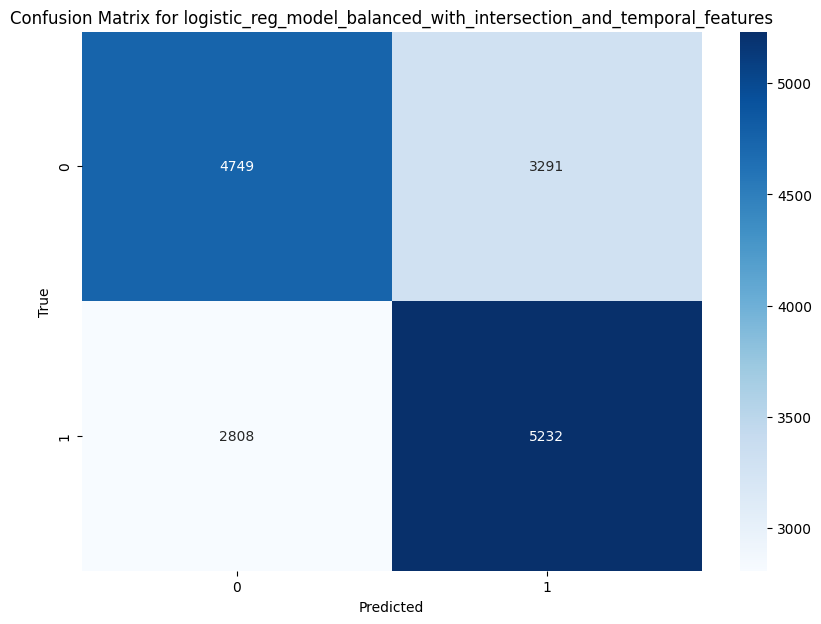

Confusion matrix graph saved as: logistic_reg_model_balanced_with_intersection_and_temporal_features_confusion_matrix.png


In [ ]:
LogisticRegressionTest(X_train, Y_train, X_test, Y_test, "logistic_reg_model_balanced_with_intersection_and_temporal_features")


## Milestone 4 - Neural Networks

In [54]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense

From the exploration of milestone 3, we will start exploring the feasibility of neural networks using a balanced dataset of equal numbers of violent/non-violent incidents.

In [140]:
violent_df = df_cleaned[df_cleaned['violent'] == True]
nonviolent_df = df_cleaned[df_cleaned['violent'] == False]
min_size = min(len(violent_df), len(nonviolent_df))
balanced_violent_df = violent_df.sample(n=min_size, random_state=1)
balanced_nonviolent_df = nonviolent_df.sample(n=min_size, random_state=1)
balanced_df = pd.concat([balanced_violent_df, balanced_nonviolent_df])

In [141]:
from sklearn.model_selection import train_test_split
y = balanced_df['violent']
X_train, X_test, Y_train, Y_test = train_test_split(balanced_df.drop(columns=['violent']), y, test_size=0.1, random_state=42, stratify=y)
balanced_df['violent'] = balanced_df['violent'].astype(int)

In [142]:
X_train

,Latitude,Longitude,Hour,DayOfWeek,Month,Community_01ST ST,Community_02ND AVE,Community_02ND ST,Community_03RD AVE,Community_03RD ST,...,Community_WOOL ST,Community_WOOLSEY ST,Community_WRIGHT ST,Community_YERBA BUENA AVE,Community_YORBA ST,Community_YORK ST,Community_YOSEMITE AVE,Community_YUKON ST,Community_ZIRCON PL,Community_ZOE ST
170382,0.579580,-0.585775,0.470799,-0.493855,0.746601,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
612917,0.469771,0.298493,-0.149052,0.013516,1.628659,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
740390,0.170935,0.446732,-1.698678,1.028259,0.452581,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
260202,-1.798011,-0.721603,-0.304014,-0.493855,1.334640,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
429012,0.014848,-0.193598,0.005911,-0.493855,-0.429477,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
762607,0.587763,-0.834007,-0.149052,0.013516,0.158562,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
239307,1.247070,0.907344,-1.078828,1.028259,0.452581,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
27236,0.503371,-1.235419,0.470799,-0.493855,-0.429477,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
710459,0.941035,0.050132,0.625762,-1.508598,-1.605555,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


We will first just randomly build one to two neural networks to see what accuracy we can possibly get.

In [109]:
activation_fxn = 'relu'
firstNN = Sequential([
    Dense(128, activation=activation_fxn, input_shape=(X_train.shape[1],)),
    Dense(64, activation=activation_fxn),
    Dense(32, activation=activation_fxn),
    Dense(16, activation=activation_fxn),
    Dense(1, activation=activation_fxn),
])

firstNN.compile(optimizer = 'rmsprop', loss = 'binary_crossentropy', metrics=['accuracy'])

In [110]:
history = firstNN.fit(X_train_balanced, Y_train_balanced, validation_split = 0.2, batch_size = 10, epochs = 10, verbose = 1)

Epoch 1/10


c:\Python310\lib\site-packages\keras\engine\data_adapter.py:1696: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return t[start:end]


10030/10030 [==============================] - 11s 1ms/step - loss: 0.6827 - accuracy: 0.5789 - val_loss: 0.6712 - val_accuracy: 0.5898
Epoch 2/10
10030/10030 [==============================] - 10s 1ms/step - loss: 0.7297 - accuracy: 0.5905 - val_loss: 0.7584 - val_accuracy: 0.5883
Epoch 3/10
10030/10030 [==============================] - 10s 1ms/step - loss: 0.7550 - accuracy: 0.5921 - val_loss: 0.6704 - val_accuracy: 0.5903
Epoch 4/10
10030/10030 [==============================] - 10s 1ms/step - loss: 0.6991 - accuracy: 0.5931 - val_loss: 0.6706 - val_accuracy: 0.5907
Epoch 5/10
10030/10030 [==============================] - 10s 1ms/step - loss: 0.6872 - accuracy: 0.5934 - val_loss: 0.6698 - val_accuracy: 0.5886
Epoch 6/10
10030/10030 [==============================] - 10s 1ms/step - loss: 0.7075 - accuracy: 0.5935 - val_loss: 0.6875 - val_accuracy: 0.5914
Epoch 7/10
10030/10030 [==============================] - 10s 1ms/step - loss: 0.7585 - accuracy: 0.5947 - val_loss: 1.0100 - val

In [74]:
def plotHistory(history):
  plt.plot(history.history['loss'])
  plt.plot(history.history['val_loss'])
  plt.title('model loss')
  plt.ylabel('loss')
  plt.xlabel('epoch')
  plt.legend(['train', 'val'], loc='upper left')

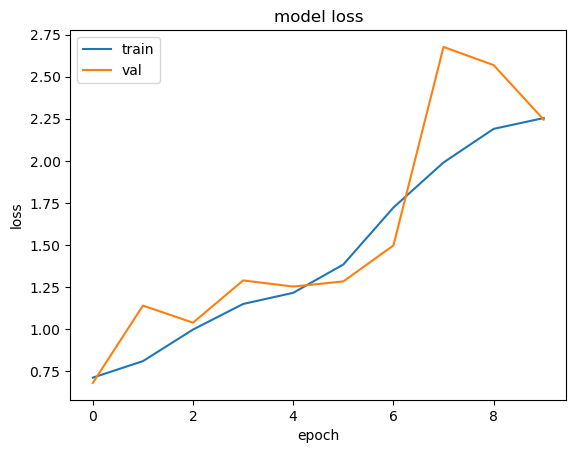

In [146]:
plotHistory(history)

In [ ]:
Y_pred = firstNN.predict(X_test)
Y_pred = np.where(Y_pred > 0.5, 1, 0)
report_firstNN = classification_report(Y_test, Y_pred)
print(report_firstNN)

503/503 [==============================] - 1s 1ms/step
              precision    recall  f1-score   support

       False       0.55      0.72      0.63      8040
        True       0.60      0.42      0.49      8040

    accuracy                           0.57     16080
   macro avg       0.58      0.57      0.56     16080
weighted avg       0.58      0.57      0.56     16080



In [ ]:
activation_fxn = 'tanh'
secondNN = Sequential([
    Dense(128, activation=activation_fxn, input_shape=(X_train.shape[1],)),
    Dense(64, activation=activation_fxn),
    Dense(32, activation=activation_fxn),
    Dense(16, activation=activation_fxn),
    Dense(8, activation=activation_fxn),
    Dense(1, activation=activation_fxn),
])
secondNN.compile(optimizer = 'rmsprop', loss = 'binary_crossentropy', metrics=['accuracy'])

In [ ]:
history2 = secondNN.fit(X_train, Y_train, validation_split = 0.2, batch_size = 10, epochs = 30, verbose = 1)

Epoch 1/30
11577/11577 [==============================] - 33s 3ms/step - loss: 0.7002 - accuracy: 0.5559 - val_loss: 0.6845 - val_accuracy: 0.5737
Epoch 2/30
11577/11577 [==============================] - 32s 3ms/step - loss: 0.6814 - accuracy: 0.5682 - val_loss: 0.6799 - val_accuracy: 0.5704
Epoch 3/30
11577/11577 [==============================] - 29s 3ms/step - loss: 0.6801 - accuracy: 0.5711 - val_loss: 0.6815 - val_accuracy: 0.5747
Epoch 4/30
11577/11577 [==============================] - 31s 3ms/step - loss: 0.6787 - accuracy: 0.5731 - val_loss: 0.6783 - val_accuracy: 0.5838
Epoch 5/30
11577/11577 [==============================] - 33s 3ms/step - loss: 0.6775 - accuracy: 0.5765 - val_loss: 0.6767 - val_accuracy: 0.5790
Epoch 6/30
11577/11577 [==============================] - 30s 3ms/step - loss: 0.6761 - accuracy: 0.5778 - val_loss: 0.6759 - val_accuracy: 0.5802
Epoch 7/30
11577/11577 [==============================] - 29s 3ms/step - loss: 0.6755 - accuracy: 0.5787 - val_loss: 0

In [ ]:
Y_pred2 = secondNN.predict(X_test)
Y_pred2 = np.where(Y_pred2 > 0.5, 1, 0)
report_secondNN = classification_report(Y_test, Y_pred2)
print(report_secondNN)

503/503 [==============================] - 1s 1ms/step
              precision    recall  f1-score   support

       False       0.60      0.54      0.57      8040
        True       0.58      0.64      0.61      8040

    accuracy                           0.59     16080
   macro avg       0.59      0.59      0.59     16080
weighted avg       0.59      0.59      0.59     16080



Now, we will use parameter tuning to determine better parameters, and then use the best ones to construct our model.

In [ ]:
!pip install keras_tuner

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 2.1 MB/s eta 0:00:00


In [ ]:
import keras_tuner as kt
def build_model(hp):
    model = tf.keras.Sequential([
        tf.keras.layers.Dense(hp.Int('nodes', min_value=1, max_value=128, step=16), activation=hp.Choice('activation', values=['relu', 'tanh', 'sigmoid', 'LeakyReLU']), input_shape=(X_train.shape[1],)),
        tf.keras.layers.Dense(hp.Int('nodes', min_value=1, max_value=128, step=16), activation=hp.Choice('activation', values=['relu', 'tanh', 'sigmoid', 'LeakyReLU'])),
        tf.keras.layers.Dense(hp.Int('nodes', min_value=1, max_value=128, step=16), activation=hp.Choice('activation', values=['relu', 'tanh', 'sigmoid', 'LeakyReLU'])),
        tf.keras.layers.Dense(hp.Int('nodes', min_value=1, max_value=128, step=16), activation=hp.Choice('activation', values=['relu', 'tanh', 'sigmoid', 'LeakyReLU'])),
        tf.keras.layers.Dense(1, activation=hp.Choice('activation', values=['relu', 'tanh', 'sigmoid', 'LeakyReLU']))
    ])

    model.compile(optimizer = 'rmsprop', loss = 'binary_crossentropy', metrics=['accuracy'])
    return model


tuner = kt.RandomSearch(
    hypermodel=build_model,
    objective='accuracy',
    max_trials=15,
    executions_per_trial=1,
    overwrite=True,
    directory='tuner',
    project_name='tuner_result'
)

In [ ]:
tuner.search(X_train, Y_train, epochs=50)

Trial 15 Complete [00h 08m 02s]
accuracy: 0.5951683521270752

Best accuracy So Far: 0.5992108583450317
Total elapsed time: 02h 13m 22s


In [ ]:
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]
for hp in best_hps.values:
  print(f'{hp}:{best_hps.get(hp)}')

best_trial = tuner.oracle.get_best_trials(num_trials=1)[0]
best_accuracy = best_trial.score
print(f"Best trail accuracy: {best_accuracy}")

nodes:33
activation:tanh
Best trail accuracy: 0.5992108583450317


Now, we build the final neural network with the result above.

In [19]:
activation_fxn = 'tanh'
thirdNN = Sequential([
    Dense(33, activation=activation_fxn, input_shape=(X_train.shape[1],)),
    Dense(33, activation=activation_fxn),
    Dense(33, activation=activation_fxn),
    Dense(33, activation=activation_fxn),
    Dense(1, activation=activation_fxn),
])
thirdNN.compile(optimizer = 'rmsprop', loss = 'binary_crossentropy', metrics=['accuracy'])

In [20]:
history3 = thirdNN.fit(X_train, Y_train, validation_split = 0.2, batch_size = 10, epochs = 30, verbose = 1)

Epoch 1/30
11577/11577 [==============================] - 50s 4ms/step - loss: 0.6999 - accuracy: 0.5555 - val_loss: 0.6891 - val_accuracy: 0.5611
Epoch 2/30
11577/11577 [==============================] - 26s 2ms/step - loss: 0.6813 - accuracy: 0.5686 - val_loss: 0.6796 - val_accuracy: 0.5739
Epoch 3/30
11577/11577 [==============================] - 30s 3ms/step - loss: 0.6797 - accuracy: 0.5722 - val_loss: 0.6793 - val_accuracy: 0.5762
Epoch 4/30
11577/11577 [==============================] - 30s 3ms/step - loss: 0.6790 - accuracy: 0.5728 - val_loss: 0.6774 - val_accuracy: 0.5766
Epoch 5/30
11577/11577 [==============================] - 27s 2ms/step - loss: 0.6779 - accuracy: 0.5745 - val_loss: 0.6835 - val_accuracy: 0.5647
Epoch 6/30
11577/11577 [==============================] - 26s 2ms/step - loss: 0.6776 - accuracy: 0.5740 - val_loss: 0.6766 - val_accuracy: 0.5774
Epoch 7/30
11577/11577 [==============================] - 26s 2ms/step - loss: 0.6768 - accuracy: 0.5761 - val_loss: 0

In [21]:
Y_pred3 = thirdNN.predict(X_test)
Y_pred3 = np.where(Y_pred3 > 0.5, 1, 0)
report_thirdNN = classification_report(Y_test, Y_pred3)
print(report_thirdNN)

503/503 [==============================] - 1s 1ms/step
              precision    recall  f1-score   support

       False       0.62      0.44      0.51      8040
        True       0.57      0.73      0.64      8040

    accuracy                           0.58     16080
   macro avg       0.59      0.58      0.58     16080
weighted avg       0.59      0.58      0.58     16080



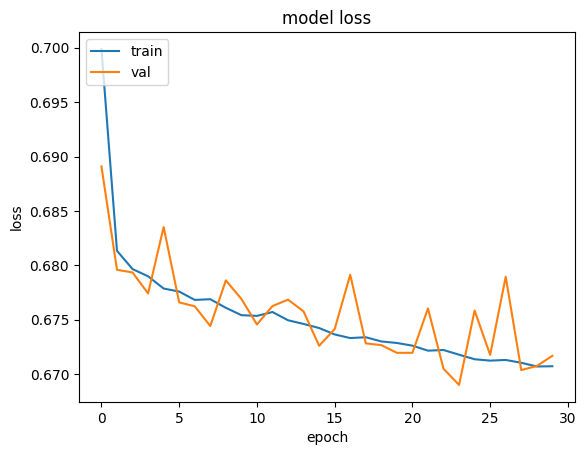

In [24]:
plotHistory(history3)

## Milestone 4 - SVM Classifiers

In [78]:
X_train

,Latitude,Longitude,Hour_0,Hour_1,Hour_2,Hour_3,Hour_4,Hour_5,Hour_6,Hour_7,...,Month_3,Month_4,Month_5,Month_6,Month_7,Month_8,Month_9,Month_10,Month_11,Month_12
288478,-0.225545,-2.013714,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
462416,-0.187699,0.628768,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
466304,-0.300918,1.303535,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
191164,-1.276940,1.599506,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
624742,-1.422779,0.808894,0,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
423311,0.070460,0.563813,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
601410,0.530989,-0.987783,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
796127,-1.556170,0.340328,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
286529,1.543921,0.512172,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [37]:
from sklearn.svm import SVC

def train_svc(x_train, y_train, x_test, y_test, kernelType='linear', C=1):
    svm_linear = SVC(kernel=kernelType,C=C)
    svm_linear.fit(x_train, y_train)
    y_hat = svm_linear.predict(x_test)
    f1_test = f1_score(y_test, y_hat, average='binary')  # Adjust average as needed
    print(f'f1 score is {f1_test} ')
    print(classification_report(y_test,y_hat))
    cm = confusion_matrix(y_test, y_hat)
    plt.figure(figsize=(10, 7))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    return svm_linear

In [89]:
from sklearn.svm import SVC
from sklearn.metrics import f1_score, classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import seaborn as sns

def train_svc_tuned(x_train, y_train, x_test, y_test):
    parameter_grid = {
        'kernel': ['poly'],  # Specify kernel type
        'C': [0.1, 1, 10],  # Regularization parameter
        'degree': [2, 3, 4],  # Degree of the polynomial kernel
        'gamma': ['scale', 'auto'],  # Kernel coefficient
        'coef0': [0.0, 0.5, 1.0]  # Independent term in polynomial kernel
    }
    
    svm = SVC()
    grid_search = GridSearchCV(svm, parameter_grid, scoring='f1', cv=5)
    grid_search.fit(x_train, y_train)
    
    print("Best parameters found: ", grid_search.best_params_)
    best_model = grid_search.best_estimator_
    
    y_hat = best_model.predict(x_test)
    f1_test = f1_score(y_test, y_hat, average='binary')
    print(f'F1 score is {f1_test}')
    print(classification_report(y_test, y_hat))
    
    cm = confusion_matrix(y_test, y_hat)
    plt.figure(figsize=(10, 7))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    
    return best_model


In [80]:
svc_linear = train_svc(X_train,Y_train, X_test, Y_test)

              precision    recall  f1-score   support

         0.0       0.56      0.63      0.59     16035
         1.0       0.58      0.50      0.54     16124

    accuracy                           0.56     32159
   macro avg       0.57      0.56      0.56     32159
weighted avg       0.57      0.56      0.56     32159



In [81]:
svc_poly = train_svc(X_train,Y_train, X_test, Y_test, 'poly')

              precision    recall  f1-score   support

         0.0       0.57      0.53      0.55     16035
         1.0       0.56      0.60      0.58     16124

    accuracy                           0.57     32159
   macro avg       0.57      0.57      0.57     32159
weighted avg       0.57      0.57      0.57     32159



In [82]:
svc_rbf = train_svc(X_train,Y_train, X_test, Y_test, 'rbf', 1)

              precision    recall  f1-score   support

         0.0       0.60      0.50      0.54     16035
         1.0       0.57      0.66      0.61     16124

    accuracy                           0.58     32159
   macro avg       0.58      0.58      0.58     32159
weighted avg       0.58      0.58      0.58     32159



In [87]:
svc_rbf_01 = train_svc(X_train,Y_train, X_test, Y_test, 'rbf', 0.1)

              precision    recall  f1-score   support

         0.0       0.60      0.47      0.52     16035
         1.0       0.57      0.69      0.62     16124

    accuracy                           0.58     32159
   macro avg       0.58      0.58      0.57     32159
weighted avg       0.58      0.58      0.57     32159



In [88]:
svc_rbf_10 = train_svc(X_train,Y_train, X_test, Y_test, 'rbf', 10)

              precision    recall  f1-score   support

         0.0       0.57      0.53      0.55     16035
         1.0       0.57      0.61      0.59     16124

    accuracy                           0.57     32159
   macro avg       0.57      0.57      0.57     32159
weighted avg       0.57      0.57      0.57     32159



In [89]:
svc_rbf_100 = train_svc(X_train,Y_train, X_test, Y_test, 'rbf', 100)

              precision    recall  f1-score   support

         0.0       0.57      0.52      0.54     16035
         1.0       0.56      0.61      0.58     16124

    accuracy                           0.56     32159
   macro avg       0.56      0.56      0.56     32159
weighted avg       0.56      0.56      0.56     32159



Trying with different encoding methods

### Experiment with new encoding technique

We now try to encode daytime into cos/sin encoding to preserve its cynical nature, then we add neighborhood information

In [51]:
X_train, X_test, Y_train, Y_test = getTrainingData(improved_df, balanced=True)

,Latitude,Longitude,hour_sin,hour_cos,Incident Year_2018,Incident Year_2019,Incident Year_2020,Incident Year_2021,Incident Year_2022,Incident Year_2023,...,Neighborhoods_108.0,Neighborhoods_109.0,Neighborhoods_110.0,Neighborhoods_111.0,Neighborhoods_112.0,Neighborhoods_113.0,Neighborhoods_114.0,Neighborhoods_115.0,Neighborhoods_116.0,Neighborhoods_117.0
275708,0.185613,0.060638,0.882948,0.469472,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
426384,0.671781,1.107071,0.997859,-0.065403,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
256612,-0.552423,0.236387,-0.300706,0.953717,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
507518,-0.597508,0.733999,0.942641,-0.333807,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
715598,-2.203117,-1.078602,-0.887011,0.461749,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
351530,-1.056753,0.091860,-0.793353,-0.608761,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
224391,0.218918,-2.281656,-0.065403,0.997859,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
461224,0.365928,0.434518,-0.258819,-0.965926,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
488025,1.028753,0.817843,0.398749,0.917060,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


In [111]:
train_svc(X_train,Y_train, X_test, Y_test, 'rbf', 1)

              precision    recall  f1-score   support

         0.0       0.62      0.53      0.57     15645
         1.0       0.59      0.68      0.63     15699

    accuracy                           0.60     31344
   macro avg       0.61      0.60      0.60     31344
weighted avg       0.61      0.60      0.60     31344



SVC(C=1)

### Fine tuning with best set of features

In [114]:
C = [0.001, 0.1, 1, 10]
for c in C:
    print("Testing with c = ", c)
    train_svc(X_train,Y_train, X_test, Y_test, 'rbf', c)


Testing with c =  0.001
              precision    recall  f1-score   support

         0.0       0.59      0.52      0.55     15645
         1.0       0.57      0.64      0.60     15699

    accuracy                           0.58     31344
   macro avg       0.58      0.58      0.58     31344
weighted avg       0.58      0.58      0.58     31344

Testing with c =  0.1
              precision    recall  f1-score   support

         0.0       0.60      0.54      0.57     15645
         1.0       0.58      0.65      0.62     15699

    accuracy                           0.59     31344
   macro avg       0.59      0.59      0.59     31344
weighted avg       0.59      0.59      0.59     31344

Testing with c =  1
              precision    recall  f1-score   support

         0.0       0.62      0.53      0.57     15645
         1.0       0.59      0.68      0.63     15699

    accuracy                           0.60     31344
   macro avg       0.61      0.60      0.60     31344
weighted

f1 score is 0.6264683312673397 
              precision    recall  f1-score   support

         0.0       0.61      0.52      0.56     15644
         1.0       0.58      0.68      0.63     15700

    accuracy                           0.60     31344
   macro avg       0.60      0.60      0.59     31344
weighted avg       0.60      0.60      0.59     31344



SVC(C=1)

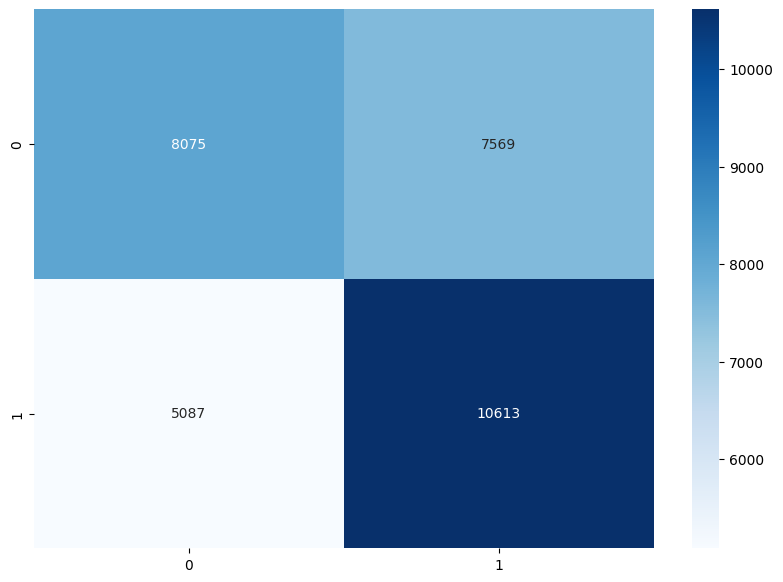

In [87]:
train_svc(X_train,Y_train, X_test, Y_test, 'rbf', 1)
